In [1]:
from sklearn.datasets import load_diabetes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = load_diabetes()

In [4]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [13]:
df = pd.DataFrame(data = data.data, columns = data.feature_names)


In [14]:
df["target"] = data.target

In [15]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [18]:
X, y = load_diabetes(return_X_y=True)

In [19]:
X.shape

(442, 10)

In [21]:
y.shape

(442,)

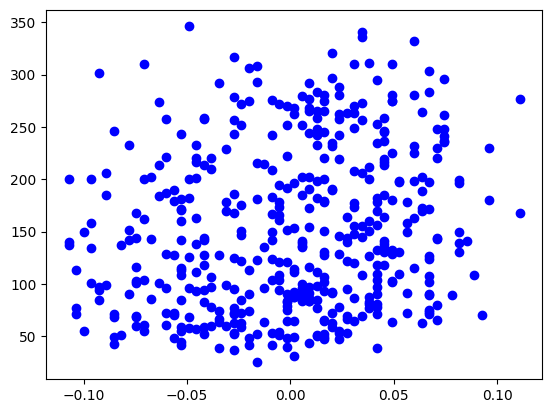

In [46]:
plt.scatter(X[:,0],y , color = "blue" , marker = "o")
plt.show()

# **Using Sklearn library**

In [22]:
from sklearn.model_selection import train_test_split

In [31]:
X_train ,X_test ,Y_train , Y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [32]:
X_train.shape

(353, 10)

In [33]:
Y_train.shape

(353,)

In [34]:
X_test.shape

(89, 10)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
LR = LinearRegression()

In [37]:
LR.fit(X_train,Y_train)

LinearRegression()

In [62]:
y_pred = LR.predict(X_test)

In [63]:
y_pred

array([154.1213881 , 204.81835118, 124.93755353, 106.08950893,
       258.5348576 , 256.3310074 , 118.75087616, 119.52440696,
       101.50816735, 190.54048661, 141.70656811, 172.51883961,
       174.33861649, 134.80942706, 294.13994537,  94.11798038,
       211.97059795, 156.49579378, 134.21000428, 119.62664644,
       148.87842251, 165.00873409, 151.10021038, 176.04063756,
       133.27769647, 221.29555392, 197.17324941,  96.1577688 ,
        50.26012711, 230.48580317, 242.06073866, 114.11129218,
        67.07532417,  94.52943825, 201.21415375, 167.05136201,
       159.881268  , 192.78746659, 114.49551325, 233.48234551,
       140.82563045, 121.0680409 , 192.27480772, 191.12738845,
       179.16865788, 148.34935601, 163.47414622, 276.81647884,
       100.17926432, 164.10555298, 255.80762189, 136.9466204 ,
       152.37503699, 107.92237882, 194.21924678,  77.34670792,
       118.50482479,  68.38335763, 154.29258529, 162.48840259,
       168.36788326, 156.87790322,  97.14191797, 238.16

In [39]:
from sklearn.metrics import r2_score

In [40]:
r2_score(Y_test,y_pred)

0.4399338661568968

In [47]:
LR.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [48]:
LR.intercept_

np.float64(151.88331005254167)

# **Build Using Normal Equation**

In [58]:
class ScratchLinearRegression():
  def __init__(self, coef , intercept):
    self.coef = coef
    self.intercept = intercept


  def fit(self,X_train,Y_train):
    X_train = np.insert(X_train, 0, 1, axis=1)

    betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(Y_train)
    self.intercept = betas[0]
    self.coef = betas[1:]

  def predict(self,X_test):
    Y_pred = np.dot(X_test , self.coef) + self.intercept
    return Y_pred

In [59]:
reg = ScratchLinearRegression(coef=None, intercept=None)

In [60]:

reg.fit(X_train,Y_train)


In [61]:
reg.predict(X_test)

array([154.1213881 , 204.81835118, 124.93755353, 106.08950893,
       258.5348576 , 256.3310074 , 118.75087616, 119.52440696,
       101.50816735, 190.54048661, 141.70656811, 172.51883961,
       174.33861649, 134.80942706, 294.13994537,  94.11798038,
       211.97059795, 156.49579378, 134.21000428, 119.62664644,
       148.87842251, 165.00873409, 151.10021038, 176.04063756,
       133.27769647, 221.29555392, 197.17324941,  96.1577688 ,
        50.26012711, 230.48580317, 242.06073866, 114.11129218,
        67.07532417,  94.52943825, 201.21415375, 167.05136201,
       159.881268  , 192.78746659, 114.49551325, 233.48234551,
       140.82563045, 121.0680409 , 192.27480772, 191.12738845,
       179.16865788, 148.34935601, 163.47414622, 276.81647884,
       100.17926432, 164.10555298, 255.80762189, 136.9466204 ,
       152.37503699, 107.92237882, 194.21924678,  77.34670792,
       118.50482479,  68.38335763, 154.29258529, 162.48840259,
       168.36788326, 156.87790322,  97.14191797, 238.16

In [64]:
r2_score(Y_test,reg.predict(X_test))

0.43993386615689634

In [65]:
reg.coef

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [67]:
reg.intercept

np.float64(151.88331005254165)

# **Build Using Stochastic Gradient Descent**

In [96]:
class SGDRegressor:
    def __init__(self, learning_rate , epochs):
        self.coef = None
        self.intercept = None
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X_train, Y_train):
        self.intercept = 0
        self.coef = np.zeros(X.shape[1])

        for epochs in range(self.epochs):
          for j in range(X_train.shape[0]):
            index = np.random.randint(0, X_train.shape[0])

            y_hat = np.dot(X_train[index], self.coef) + self.intercept

            slope_intercept = -2 * (Y_train[index] - y_hat)
            self.intercept = self.intercept - (self.learning_rate * slope_intercept)

            slope_coef = -2 * np.dot((Y_train[index] - y_hat), X_train[index])
            self.coef = self.coef - (self.learning_rate * slope_coef)

        print(self.intercept, self.coef)

    def predict(self, X_test):
        y_pred = np.dot(X_test, self.coef) + self.intercept
        return y_pred


In [97]:
SGD = SGDRegressor(learning_rate=0.01,epochs=100)

In [98]:
SGD.fit(X_train,Y_train)

156.91192438940612 [  31.58756459 -146.56648274  467.12076095  294.97857369  -27.16613263
  -95.41708866 -190.21925067  108.17004309  407.69849706  112.52477119]


In [99]:

SGD.predict(X_test)

array([157.63304753, 200.90173549, 136.12112194, 110.358609  ,
       264.52151024, 254.68068773, 116.06407292, 120.33857258,
       100.78174794, 192.15474423, 153.67480666, 176.78143797,
       185.35569922, 145.83214658, 287.2115501 ,  93.13797277,
       202.28603298, 150.54818316, 138.97443279, 136.99222508,
       151.19619895, 181.60226614, 158.33959438, 179.60683623,
       132.55004289, 227.13125706, 204.45231433, 111.19518669,
        62.4846021 , 242.17537649, 247.24845947, 118.72735833,
        74.09367862, 104.04978448, 207.42077919, 169.69012355,
       167.63479412, 197.42963547, 118.71666253, 241.08254488,
       146.02540955, 127.17205211, 191.64876438, 189.70499685,
       179.89429313, 148.32962342, 175.43292365, 297.87485017,
       113.2662908 , 178.92742985, 254.28128941, 145.57871813,
       154.61928485, 135.92181178, 195.77667088, 104.64969972,
       139.75164279,  83.8076635 , 162.64666294, 158.26748895,
       167.32104541, 168.90795578, 110.05886665, 225.88

In [100]:
r2_score(Y_test,SGD.predict(X_test))

0.45180277391076007

In [ ]:
# We can see using stochastic gradient desecent, understands 45% of variance in data which is better than normal equation